In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('Data/Credit_Scoring.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


### 1. Có phải những khách hàng không có người phụ thuộc sẽ có thu nhập trung bình theo tháng (MonthlyIncome) nhỏ hơn những khách hàng có người phụ thuộc không (với mức ý nghĩa 10%)


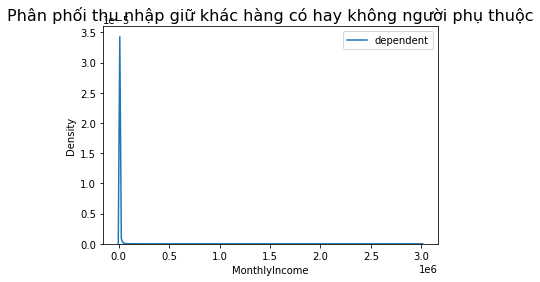

In [3]:
independ = df.loc[df['NumberOfDependents'].isna(),'MonthlyIncome']
depend = df.loc[df['NumberOfDependents'].notna(),'MonthlyIncome']
sns.kdeplot(independ, label = 'independent')
sns.kdeplot(depend,label = 'dependent')
plt.title('Phân phối thu nhập giữ khác hàng có hay không người phụ thuộc', fontsize = 16)
plt.legend()
plt.show()

- Ta thấy rằng những người không có người phụ thuộc thì giá trị MonthlyIncome toàn nan nên không thể đưa ra kết luận.
- Ta sẽ dùng phương pháp nội suy để điền giá trị thiếu cho cột MonthlyIncome

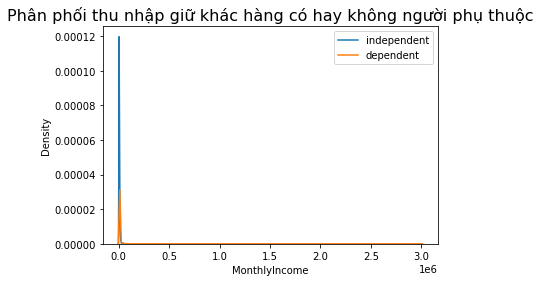

In [4]:
# nội suy
df['MonthlyIncome'] = df['MonthlyIncome'].interpolate('nearest')

##
independ = df.loc[df['NumberOfDependents'].isna(),'MonthlyIncome']
depend = df.loc[df['NumberOfDependents'].notna(),'MonthlyIncome']
sns.kdeplot(independ , label = 'independent')
sns.kdeplot(depend,label = 'dependent')
plt.title('Phân phối thu nhập giữ khác hàng có hay không người phụ thuộc', fontsize = 16)
plt.legend()
plt.show()

### Phát biểu giả thuyết :
- H0 : $\mu_{Income0}$ = $\mu_{Income1}$
- H1 : $\mu_{Income0}$ < $\mu_{Income1}$ \
Income0 là những khách hàng không có người phụ thuộc, Income1 là những khách hàng có người phụ thuộc

In [5]:
statistic, pvalue = ttest_ind(independ.values,depend.values,equal_var=False,
                             alternative='less', nan_policy='omit')
print(f'statistic : {statistic}')
print(f'pvalue : {pvalue}')

statistic : -2.3973067971312543
pvalue : 0.00827406965535004


### Kết luận : pvalue < $\alpha$
- Bác bỏ H0
- Vậy với độ tin cậy 90% thì chấp nhận thu nhập hằng tháng khách hàng không có người phụ thuộc thấp hơn khách hàng có người phụ thuộc.
- Phương pháp trên dùng nội suy nên không chắc chắn

### 2. Có phải trung bình số lượng khoản vay (NumberOfOpenCreditLinesAndLoans) những khách hàng gặp khó khăn trong vòng 2 năm trở lại đây (SeriousDlqin2yrs =1) thì sẽ cao hơn những khách hàng không gặp khó khăn không với mức ý nghĩa 10%

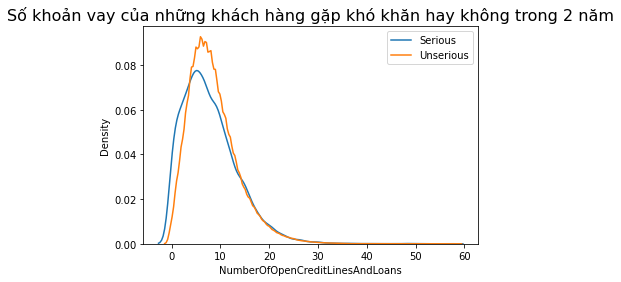

In [6]:
serious = df.loc[df['SeriousDlqin2yrs'] == 1, 'NumberOfOpenCreditLinesAndLoans']
unserious = df.loc[df['SeriousDlqin2yrs'] != 1, 'NumberOfOpenCreditLinesAndLoans']
sns.kdeplot(serious, label = 'Serious')
sns.kdeplot(unserious, label = 'Unserious')
plt.title('Số khoản vay của những khách hàng gặp khó khăn hay không trong 2 năm', fontsize = 16)
plt.legend()
plt.show()

### Phát biểu giả thuyết
- H0 : $\mu_{Serious}$ = $\mu_{Unserious}$
- H1 : $\mu_{Serious}$ > $\mu_{Unserious}$

In [9]:
statistic, pvalue = ttest_ind(serious.values,unserious.values, equal_var=False,
                             alternative ='greater')
print(f'statistic : {statistic}')
print(f'pvalue : {pvalue}')

statistic : -10.53484996850356
pvalue : 1.0


### Kết luận : pvalue > $\alpha$
- Chưa đủ cơ sở bác bỏ H0
- Với độ tin cậy 90% thì xem như số khoản vay của người gặp khó khăn và người không gặp khó khăn là như nhau